In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/privacy/")
from privacy.encode import encodeData, encodeNonAnonData
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/")

In [16]:
data = "texas"
k_list = [2, 3, 4, 5]

In [17]:
class Mondrian_Utility:
    def __init__(self, data, k_list):
        self.data = data
        self.k_list = k_list
    
    def anonymize(self):
        for k in self.k_list:
            os.system(f'python privacy/anonymize.py --method={"classic_mondrian"} --k={k} --dataset={self.data}')
    
    def get_features(self):
        self.features = []
        self.val = []
        for k in self.k_list:
            _, X_org, y_org, _, X_anon, y_anon = encodeData(self.data, k)
            if not len(self.features):
                self.features.append((X_org, y_org))
            self.features.append((X_anon, y_anon))
        _, X_val, y_val = encodeNonAnonData(self.data, f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{self.data}/val.csv')
        self.val_data = X_val, y_val

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            if self.data == "texas":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1)])
            elif self.data == "adult":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')])
            else:
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(10, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')])
            self.models.append(model)

    def compile_models(self):
        for i in range(len(self.models)):
            if self.data == "adult":
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='binary_crossentropy',
                    metrics=["accuracy"])
            elif self.data == "texas":
                self.models[i].compile(optimizer='adam',
                    loss='mean_squared_error')
            else:
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='categorical_crossentropy',
                    metrics=["accuracy"])

    def prepare_training(self):
        self.anonymize()
        self.get_features()
        self.get_model()
        self.compile_models()
    
    def train(self):
        self.histories = []
        for i in range(len(self.k_list) + 1):
            X, y = self.features[i]
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
            history = self.models[i].fit(X, y, epochs=100, batch_size=64, validation_data=self.val_data, callbacks=[callback])
            self.histories.append(history)
            if i == 0:
                self.models[i].save(f"./weights/model_{self.data}_org.h5")
            else:
                self.models[i].save(f"./weights/model_{self.data}_{k_list[i-1]}.h5")
            print(f"{i+1} trained.")

    def plot_results(self):
        for i in range(len(self.histories)):
            if i == 0:
                plt.plot(self.histories[i].history['accuracy'], label="Original")
            else:
                plt.plot(self.histories[i].history['accuracy'], label=f"K = {self.k_list[i-1]}")
        plt.title("Train Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
            

In [18]:
mond_util = Mondrian_Utility(data, k_list)

In [19]:
mond_util.prepare_training()

Replacing all generalized values...


25532it [00:00, 25644.29it/s]


25532
Replacing all generalized values...


16610it [00:00, 26252.90it/s]


16610
Replacing all generalized values...


12590it [00:00, 27103.30it/s]


12590
Replacing all generalized values...


10170it [00:00, 26849.43it/s]


10170
Replacing all generalized values...


75555it [00:02, 27203.90it/s]


75555


In [20]:
mond_util.features[0][0][0]


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [21]:
mond_util.train()

Epoch 1/100


2023-12-01 09:51:59.111983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 0.6823

2023-12-01 09:52:09.353045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 14s 12ms/step - loss: 0.6823 - val_loss: 0.5381
Epoch 2/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.5453 - val_loss: 0.5915
Epoch 3/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.5094 - val_loss: 0.4798
Epoch 4/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.4885 - val_loss: 0.4447
Epoch 5/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.4651 - val_loss: 0.4327
Epoch 6/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.4577 - val_loss: 0.5108
Epoch 7/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.4417 - val_loss: 0.3900
Epoch 8/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.4157 - val_loss: 0.4059
Epoch 9/100
1181/1181 [==============================] - 13s 11ms/step - loss: 0.4004 - val_loss: 0.3554
Epoch 10/100
1181/1181 [==============================] - 14s 12ms/

2023-12-01 10:44:55.028610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - ETA: 0s - loss: 0.7032

2023-12-01 10:44:58.602076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 8s 18ms/step - loss: 0.7032 - val_loss: 1.1674
Epoch 2/100
399/399 [==============================] - 7s 17ms/step - loss: 0.6276 - val_loss: 1.1687
Epoch 3/100
399/399 [==============================] - 7s 17ms/step - loss: 0.6062 - val_loss: 1.4321
Epoch 4/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5972 - val_loss: 1.3246
Epoch 5/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5816 - val_loss: 1.2794
Epoch 6/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5832 - val_loss: 1.2170
Epoch 7/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5734 - val_loss: 1.3810
Epoch 8/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5648 - val_loss: 1.2723
Epoch 9/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5664 - val_loss: 1.3260
Epoch 10/100
399/399 [==============================] - 7s 17ms/step - loss: 0.5561 - val_loss

2023-12-01 10:46:10.382367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


260/260 [==============================] - ETA: 0s - loss: 0.6994

2023-12-01 10:46:12.846111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


260/260 [==============================] - 6s 23ms/step - loss: 0.6994 - val_loss: 1.8029
Epoch 2/100
260/260 [==============================] - 6s 22ms/step - loss: 0.6099 - val_loss: 1.6037
Epoch 3/100
260/260 [==============================] - 6s 22ms/step - loss: 0.6015 - val_loss: 1.3108
Epoch 4/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5878 - val_loss: 1.5311
Epoch 5/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5808 - val_loss: 1.4801
Epoch 6/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5796 - val_loss: 1.4379
Epoch 7/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5738 - val_loss: 1.5859
Epoch 8/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5664 - val_loss: 1.4341
Epoch 9/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5636 - val_loss: 1.8232
Epoch 10/100
260/260 [==============================] - 6s 22ms/step - loss: 0.5630 - val_loss

2023-12-01 10:47:25.108436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - ETA: 0s - loss: 0.7616

2023-12-01 10:47:27.083966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 6s 29ms/step - loss: 0.7616 - val_loss: 1.3793
Epoch 2/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6632 - val_loss: 1.4271
Epoch 3/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6381 - val_loss: 1.8415
Epoch 4/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6277 - val_loss: 1.3129
Epoch 5/100
197/197 [==============================] - 5s 26ms/step - loss: 0.6225 - val_loss: 1.4288
Epoch 6/100
197/197 [==============================] - 5s 26ms/step - loss: 0.6193 - val_loss: 1.5776
Epoch 7/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6181 - val_loss: 1.8230
Epoch 8/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6088 - val_loss: 2.2075
Epoch 9/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6058 - val_loss: 2.9083
Epoch 10/100
197/197 [==============================] - 5s 27ms/step - loss: 0.6092 - val_loss

2023-12-01 10:57:46.755060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - ETA: 0s - loss: 0.7314

2023-12-01 10:57:48.735386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 7s 38ms/step - loss: 0.7314 - val_loss: 1.1808
Epoch 2/100
159/159 [==============================] - 6s 36ms/step - loss: 0.6377 - val_loss: 2.5052
Epoch 3/100
159/159 [==============================] - 6s 38ms/step - loss: 0.5990 - val_loss: 1.6441
Epoch 4/100
159/159 [==============================] - 5s 34ms/step - loss: 0.5899 - val_loss: 1.8941
Epoch 5/100
159/159 [==============================] - 5s 34ms/step - loss: 0.5844 - val_loss: 1.6528
Epoch 6/100
159/159 [==============================] - 6s 35ms/step - loss: 0.5774 - val_loss: 2.1690
Epoch 7/100
159/159 [==============================] - 6s 35ms/step - loss: 0.5673 - val_loss: 2.1882
Epoch 8/100
159/159 [==============================] - 6s 36ms/step - loss: 0.5657 - val_loss: 2.3412
Epoch 9/100
159/159 [==============================] - 5s 34ms/step - loss: 0.5664 - val_loss: 2.3529
Epoch 10/100
159/159 [==============================] - 5s 33ms/step - loss: 0.5608 - val_loss

In [1]:
for i in range(len(mond_util.histories)):
    if i == 0:
        plt.plot(mond_util.histories[i].history['loss'], label="Original")
    else:
        plt.plot(mond_util.histories[i].history['loss'], label=f"K = {mond_util.k_list[i-1]}")
plt.xlabel("Epoch")
plt.ylabel(f"Train loss")
plt.title(f"Train loss of {data} per epoch")
plt.legend()
plt.show()

NameError: name 'mond_util' is not defined

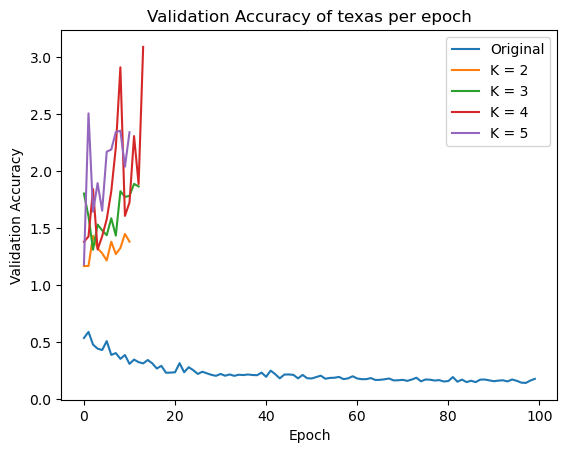

In [23]:
for i in range(len(mond_util.histories)):
    if i == 0:
        plt.plot(mond_util.histories[i].history['val_loss'], label="Original")
    else:
        plt.plot(mond_util.histories[i].history['val_loss'], label=f"K = {mond_util.k_list[i-1]}")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title(f"Validation Accuracy of {data} per epoch")
plt.legend()
plt.show()

In [25]:
test_accs = {}
for i in range(len(mond_util.k_list) + 1):
    if i == 0:
        mond_util.models[i] = tf.keras.models.load_model(f"./weights/model_{data}_org.h5")
    else:
        mond_util.models[i] = tf.keras.models.load_model(f"./weights/model_{data}_{k_list[i-1]}.h5")
    X, y = mond_util.features[i]
    _, X_test, y_test = encodeNonAnonData(data, f"/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{data}/test.csv")
    res = mond_util.models[i].evaluate(X_test, y_test)
    if i == 0:
        test_accs["Original"] = res
    else:
        test_accs[f"K = {k_list[i-1]}"] = res
print(test_accs)

Replacing all generalized values...


75555it [00:02, 26753.52it/s]


75555
  11/2362 [..............................] - ETA: 12s - loss: 0.1221 

2023-12-01 11:00:08.659191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 10s 4ms/step - loss: 0.1803
Replacing all generalized values...


75555it [00:02, 27179.75it/s]


75555
  24/2362 [..............................] - ETA: 10s - loss: 0.8537

2023-12-01 11:00:23.266996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 9s 4ms/step - loss: 1.3818
Replacing all generalized values...


75555it [00:02, 27147.65it/s]


75555
  24/2362 [..............................] - ETA: 10s - loss: 1.2779

2023-12-01 11:00:37.872233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 11s 4ms/step - loss: 1.8649
Replacing all generalized values...


75555it [00:02, 27383.35it/s]


75555
  24/2362 [..............................] - ETA: 10s - loss: 2.5704

2023-12-01 11:00:53.415231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 10s 4ms/step - loss: 3.0867
Replacing all generalized values...


75555it [00:02, 27322.65it/s]


75555
  23/2362 [..............................] - ETA: 11s - loss: 1.7823

2023-12-01 11:01:07.939814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 9s 4ms/step - loss: 2.3392
{'Original': 0.180270254611969, 'K = 2': 1.3817890882492065, 'K = 3': 1.8649026155471802, 'K = 4': 3.0866799354553223, 'K = 5': 2.3392457962036133}


<BarContainer object of 3 artists>

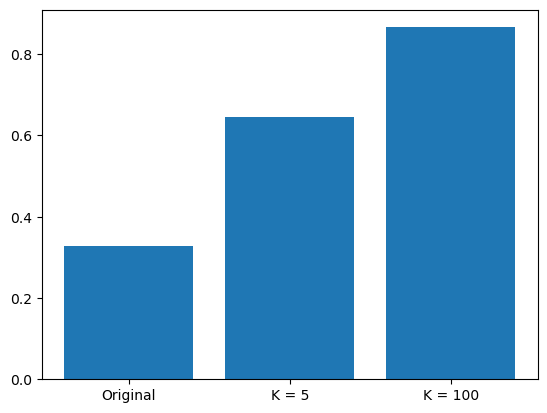

In [ ]:
names = ["Original"] + [f"K = {k}" for k in k_list]
height = [test_accs[name] for name in names]
plt.bar(names, height)

In [111]:
from sklearn.metrics import f1_score
import numpy as np
f1s = {}
for i in range(len(mond_util.k_list) + 1):
    if i == 0:
        mond_util.models[i] = tf.keras.models.load_model("./weights/model_org.h5")
    else:
        mond_util.models[i] = tf.keras.models.load_model(f"./weights/model_{k_list[i-1]}.h5")
    X, y = mond_util.features[i]
    _, X_test, y_test = encodeNonAnonData("occupancy", "/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/occupancy/test.csv")
    pred = mond_util.models[i].predict(X_test)
    f1 = f1_score(y_test, pred>0.5, average='weighted')
    print(f1)
    if i == 0:
        f1s["Original"] = f1
    else:
        f1s[f"K = {k_list[i-1]}"] = f1
# print(f1s)

Replacing all generalized values...


861it [00:00, 28388.46it/s]

27/27 [==============================] - 0s 3ms/step
0.6817690143297375



2023-11-26 23:44:30.772430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Replacing all generalized values...


861it [00:00, 28405.43it/s]

27/27 [==============================] - 0s 3ms/step
0.67082258735795



2023-11-26 23:44:31.025067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Replacing all generalized values...


861it [00:00, 28371.73it/s]

27/27 [==============================] - 0s 3ms/step



2023-11-26 23:44:31.295302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.7012329333814965
Replacing all generalized values...


861it [00:00, 27209.06it/s]

27/27 [==============================] - 0s 3ms/step



2023-11-26 23:44:31.577586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.6588048663843884
Replacing all generalized values...


861it [00:00, 28359.70it/s]

27/27 [==============================] - 0s 3ms/step



2023-11-26 23:44:31.844527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.683367511010111
Replacing all generalized values...


861it [00:00, 28395.38it/s]

27/27 [==============================] - 0s 3ms/step



2023-11-26 23:44:32.105572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.6657236902228004
Replacing all generalized values...


861it [00:00, 28650.39it/s]

27/27 [==============================] - 0s 3ms/step



2023-11-26 23:44:32.378703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.6836894232364615
Replacing all generalized values...


861it [00:00, 27425.62it/s]

27/27 [==============================] - 0s 3ms/step



2023-11-26 23:44:32.635863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.7215795586527294
Replacing all generalized values...


861it [00:00, 28442.12it/s]

27/27 [==============================] - 0s 3ms/step
0.7264940774116908



2023-11-26 23:44:32.892648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<BarContainer object of 9 artists>

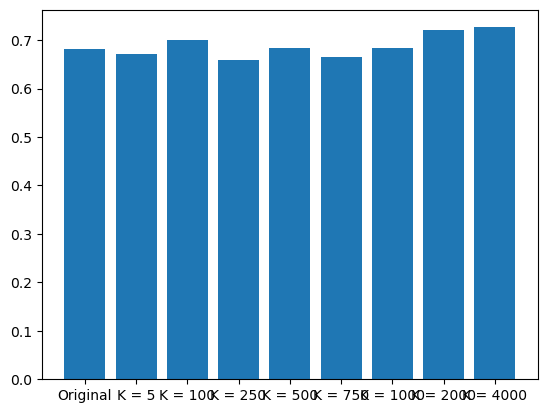

In [112]:
names = ["Original"] + [f"K = {k}" for k in k_list]
height = [f1s[name] for name in names]
plt.bar(names, height)

In [16]:
data = "texas"
method = "classic_mondrian"
k_list = [5, 20, 100, 500]
epoch_list = [500]

In [17]:
class Synthetic_Utility:
    def __init__(self, data, method, epoch_list):
        self.data = data
        self.method = method
        self.epoch_list = epoch_list
    
    def get_features(self):
        self.features = []
        self.val = []
        for epoch in self.epoch_list:
            syn_path = f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/synthetic_results/{self.data}_syn_{epoch}.csv'
            pr_data_anon, X_anon, y_anon = encodeNonAnonData(self.data, syn_path, is_syn=True)
            self.features.append((X_anon, y_anon))
            pr_data_anon.to_csv(f"./pr_synthetic_results/{self.data}_synthetic_{epoch}.csv", index=False)
        _, X_val, y_val = encodeNonAnonData(self.data, f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{self.data}/val.csv')
        self.val_data = X_val, y_val

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            if self.data == "texas":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1)])
            elif self.data == "adult":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')])
            else:
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(10, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')])
            self.models.append(model)

    def compile_models(self):
        for i in range(len(self.models)):
            if self.data == "adult":
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='binary_crossentropy',
                    metrics=["accuracy"])
            elif self.data == "texas":
                self.models[i].compile(optimizer='adam',
                    loss='mean_squared_error')
            else:
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='categorical_crossentropy',
                    metrics=["accuracy"])

    def prepare_training(self):
        self.get_features()
        self.get_model()
        self.compile_models()
    
    def train(self):
        self.histories = []
        for i in range(len(self.epoch_list)):
            X, y = self.features[i]
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
            history = self.models[i].fit(X, y, epochs=100, batch_size=64, validation_data=self.val_data, callbacks=[callback])
            self.histories.append(history)
            self.models[i].save(f"./syn_weights/model_{self.data}_{epoch_list[i]}.h5")
            print(f"{i+1} trained.")

    def plot_results(self):
        for i in range(len(self.histories)):
            if i == 0:
                plt.plot(self.histories[i].history['accuracy'], label="Original")
            else:
                plt.plot(self.histories[i].history['accuracy'], label=f"K = {self.k_list[i-1]}")
        plt.title("Train Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
            

In [18]:
syn_util = Synthetic_Utility(data, method, epoch_list)

In [19]:
syn_util.prepare_training()

Replacing all generalized values...


75555it [00:02, 26595.91it/s]


Replacing all generalized values...


75555it [00:02, 27081.12it/s]


In [20]:
syn_util.train()

Epoch 1/100


2023-11-28 11:17:08.941003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 1.0034

2023-11-28 11:17:19.600988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 15s 12ms/step - loss: 1.0034 - val_loss: 1.0012
Epoch 2/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0007 - val_loss: 0.9997
Epoch 3/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0004 - val_loss: 1.0026
Epoch 4/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0003 - val_loss: 1.0012
Epoch 5/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0002 - val_loss: 0.9997
Epoch 6/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0002 - val_loss: 1.0018
Epoch 7/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0001 - val_loss: 0.9949
Epoch 8/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0003 - val_loss: 1.0028
Epoch 9/100
1181/1181 [==============================] - 14s 12ms/step - loss: 1.0001 - val_loss: 0.9991
Epoch 10/100
1181/1181 [==============================] - 14s 12ms/

KeyboardInterrupt: 